# Library Import

In [24]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPClassifier

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Quiz1 (cancer)

```
1. breast_cancer 데이터셋을 이용하여 딥러닝으로
처리하시요(sklearn, 케라스버전)
1) train, test 분리
2) test 1번째 행 암 여부 예측
3)train, test 정확도 구하기
```

## Data

In [1]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Feature만

In [11]:
cancer_F = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_F

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### label만

In [19]:
cancer_y = pd.DataFrame(cancer['target'], columns=['y'])
cancer_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### Scaling

In [33]:
scaleF = MinMaxScaler()
cancer_F_N = scaleF.fit_transform(cancer_F)
cancer_F_N

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

#### DataFrame으로 변경

In [37]:
cancer_F_N_df = pd.DataFrame(cancer_F_N, columns=cancer_F.columns)
cancer_F_N_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Train / Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(cancer_F_N_df, 
                                                    cancer_y, 
                                                    test_size = 0.3, 
                                                    stratify = cancer_y)

In [41]:
x_train.shape, x_test.shape

((398, 30), (171, 30))

## Modeling (sklearn version)

### MLPClassifier( ) 사용

In [42]:
model_mlp = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp.fit( x_train, y_train )

C:\Users\TFG5076XG\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.65404583
Iteration 2, loss = 0.64254276
Iteration 3, loss = 0.63178379
Iteration 4, loss = 0.62082941
Iteration 5, loss = 0.61049968
Iteration 6, loss = 0.60072072
Iteration 7, loss = 0.59118145
Iteration 8, loss = 0.58160832
Iteration 9, loss = 0.57206647
Iteration 10, loss = 0.56267510
Iteration 11, loss = 0.55350941
Iteration 12, loss = 0.54431868
Iteration 13, loss = 0.53566105
Iteration 14, loss = 0.52697644
Iteration 15, loss = 0.51826052
Iteration 16, loss = 0.50961339
Iteration 17, loss = 0.50106009
Iteration 18, loss = 0.49224714
Iteration 19, loss = 0.48363698
Iteration 20, loss = 0.47504314
Iteration 21, loss = 0.46642898
Iteration 22, loss = 0.45822579
Iteration 23, loss = 0.44992340
Iteration 24, loss = 0.44173493
Iteration 25, loss = 0.43359244
Iteration 26, loss = 0.42578977
Iteration 27, loss = 0.41786673
Iteration 28, loss = 0.41008918
Iteration 29, loss = 0.40243039
Iteration 30, loss = 0.39500974
Iteration 31, loss = 0.38765113
Iteration 32, los

Iteration 364, loss = 0.03791067
Iteration 365, loss = 0.03786295
Iteration 366, loss = 0.03768939
Iteration 367, loss = 0.03752270
Iteration 368, loss = 0.03746878
Iteration 369, loss = 0.03732764
Iteration 370, loss = 0.03721268
Iteration 371, loss = 0.03716152
Iteration 372, loss = 0.03704465
Iteration 373, loss = 0.03687899
Iteration 374, loss = 0.03674226
Iteration 375, loss = 0.03667210
Iteration 376, loss = 0.03665035
Iteration 377, loss = 0.03641126
Iteration 378, loss = 0.03629508
Iteration 379, loss = 0.03625597
Iteration 380, loss = 0.03597553
Iteration 381, loss = 0.03586444
Iteration 382, loss = 0.03582120
Iteration 383, loss = 0.03569398
Iteration 384, loss = 0.03560667
Iteration 385, loss = 0.03548958
Iteration 386, loss = 0.03538921
Iteration 387, loss = 0.03535023
Iteration 388, loss = 0.03518887
Iteration 389, loss = 0.03513645
Iteration 390, loss = 0.03499799
Iteration 391, loss = 0.03492733
Iteration 392, loss = 0.03484188
Iteration 393, loss = 0.03472533
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

### Prediction ( test 1st row )

#### Test data Transform

In [82]:
scaleF.transform(x_test.iloc[[0],:])

array([[-0.32047815, -0.32241488, -0.30118503, -0.06082305,  2.61859768,
         0.52547029,  0.33932036,  0.58323024, -0.2624222 ,  4.36396188,
        -0.0111472 , -0.04308103, -0.03312675, -0.01264886,  6.46275469,
         1.95890044,  0.37719365,  6.14328178,  2.61507217,  4.61110813,
        -0.27648698, -0.31632767, -0.25034621, -0.04550007,  1.31493035,
         0.09938403,  0.1051353 ,  0.74349618, -0.21290752,  0.46629571]])

#### 1st row prediction

In [83]:
model_mlp.predict(scaleF.transform(x_test.iloc[[0],:]))

array([1])

### Accuracy

#### Train data

In [84]:
model_mlp.score( x_train, y_train)

0.9949748743718593

#### Test data

In [85]:
model_mlp.score( x_test, y_test)

0.9649122807017544

## Modeling(Keras version)

### label을 one-hot encoding 하지 않기 위해서 ==> loss='sparse_categorical_crossentropy' 사용

In [97]:
model = Sequential()

model.add( Dense( units=64, activation='relu' ) )
model.add( Dense( units=32, activation='relu' ) )
model.add( Dense( units=1, activation='sigmoid' ) )
model.compile( loss='binary_crossentropy',
               optimizer='adam',
               metrics=['acc'])
                                                                         
model.fit( x_train, y_train, epochs = 10)                    

Epoch 1/10
13/13 [==============================] - 0s 914us/step - loss: 0.6667 - acc: 0.7387
Epoch 2/10
13/13 [==============================] - 0s 748us/step - loss: 0.5995 - acc: 0.8869
Epoch 3/10
13/13 [==============================] - 0s 831us/step - loss: 0.5323 - acc: 0.9045
Epoch 4/10
13/13 [==============================] - 0s 913us/step - loss: 0.4629 - acc: 0.9171
Epoch 5/10
13/13 [==============================] - 0s 831us/step - loss: 0.3943 - acc: 0.9095
Epoch 6/10
13/13 [==============================] - 0s 831us/step - loss: 0.3338 - acc: 0.9221
Epoch 7/10
13/13 [==============================] - 0s 831us/step - loss: 0.2863 - acc: 0.9196
Epoch 8/10
13/13 [==============================] - 0s 831us/step - loss: 0.2518 - acc: 0.9271
Epoch 9/10
13/13 [==============================] - 0s 831us/step - loss: 0.2242 - acc: 0.9347
Epoch 10/10
13/13 [==============================] - 0s 914us/step - loss: 0.2045 - acc: 0.9347


### Prediction ( test 1st row )

#### Test data Transform

In [87]:
scaleF.transform(x_test.iloc[[0],:])

array([[-0.32047815, -0.32241488, -0.30118503, -0.06082305,  2.61859768,
         0.52547029,  0.33932036,  0.58323024, -0.2624222 ,  4.36396188,
        -0.0111472 , -0.04308103, -0.03312675, -0.01264886,  6.46275469,
         1.95890044,  0.37719365,  6.14328178,  2.61507217,  4.61110813,
        -0.27648698, -0.31632767, -0.25034621, -0.04550007,  1.31493035,
         0.09938403,  0.1051353 ,  0.74349618, -0.21290752,  0.46629571]])

#### 1st row prediction

In [88]:
model.predict(scaleF.transform(x_test.iloc[[0],:]))

array([[1.]], dtype=float32)

### Accuracy

#### Train data

In [99]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 749us/step - loss: 0.1908 - acc: 0.9447


[0.19077038764953613, 0.9447236061096191]

#### Test data

In [98]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 799us/step - loss: 0.2495 - acc: 0.9006


[0.2494667023420334, 0.9005848169326782]

# Quiz2 (fashion)

```
2. fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요
(sklearn, 케라스버전)
1) test 1번째 이미지 예측
2) train, test 정확도 구하기
3) confusion matrix(heat map)을 통해 분류 확인

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot
```

## Data

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [5]:
fashion = load_data()
fashion

4431872/4422102 [==============================] - 3s 1us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 변수에 초기화

In [102]:
(x_train, y_train), (x_test, y_test) = fashion

### 형태 확인

In [104]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Modeling(sklearn version)

### 학습 전, shape 확인

#### reshape

In [110]:
x_train.reshape(60000, 28*28).shape

(60000, 784)

In [112]:
y_train.shape

(60000,)

In [113]:
model_mlp = MLPClassifier( hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
model_mlp.fit( x_train.reshape(60000, 28*28), y_train )

Iteration 1, loss = 5.56043930
Iteration 2, loss = 2.37616333
Iteration 3, loss = 0.94659179
Iteration 4, loss = 0.69008752
Iteration 5, loss = 0.59238261
Iteration 6, loss = 0.53121965
Iteration 7, loss = 0.49166288
Iteration 8, loss = 0.47039345
Iteration 9, loss = 0.44679173
Iteration 10, loss = 0.43836080
Iteration 11, loss = 0.42207744
Iteration 12, loss = 0.40771180
Iteration 13, loss = 0.40295265
Iteration 14, loss = 0.39054381
Iteration 15, loss = 0.38386451
Iteration 16, loss = 0.38073445
Iteration 17, loss = 0.37901039
Iteration 18, loss = 0.37492645
Iteration 19, loss = 0.37608614
Iteration 20, loss = 0.37306838
Iteration 21, loss = 0.36603759
Iteration 22, loss = 0.36452429
Iteration 23, loss = 0.36184068
Iteration 24, loss = 0.35610752
Iteration 25, loss = 0.34821292
Iteration 26, loss = 0.34918147
Iteration 27, loss = 0.33940948
Iteration 28, loss = 0.35042118
Iteration 29, loss = 0.34278659
Iteration 30, loss = 0.33988397
Iteration 31, loss = 0.33922612
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

### Prediction ( test 1st row )

In [119]:
x_test[0].reshape(1, 28*28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [120]:
model_mlp.predict(x_test[0].reshape(1, 28*28))

array([9], dtype=uint8)

### Accuracy

#### Train data

In [128]:
model_mlp.score( x_train.reshape(60000, 28*28), y_train)

0.9031

#### Test data

In [125]:
model_mlp.score( x_test.reshape(10000, 28*28), y_test)

0.8544

### confusion matrix(heatmap)

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [141]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [142]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

#### Train data

In [146]:
confusion_matrix(y_train, model_mlp.predict(x_train.reshape(60000, 28*28)))

array([[5108,    7,  113,  233,    8,    0,  500,    0,   31,    0],
       [   4, 5908,    2,   61,    2,    0,   20,    0,    3,    0],
       [  25,    7, 5106,   42,  371,    0,  443,    0,    6,    0],
       [  76,    6,   42, 5657,   85,    0,  133,    0,    1,    0],
       [   2,    0,  614,  246, 4626,    0,  506,    0,    6,    0],
       [   1,    1,    0,    0,    0, 5970,    5,    6,   12,    5],
       [ 765,    0,  650,  112,  185,    0, 4253,    0,   35,    0],
       [   2,    0,    0,    0,    0,   36,    3, 5812,   13,  134],
       [   3,    1,    0,   14,    4,    0,   98,    0, 5880,    0],
       [   0,    0,    0,    0,    0,    5,    4,  121,    4, 5866]],
      dtype=int64)

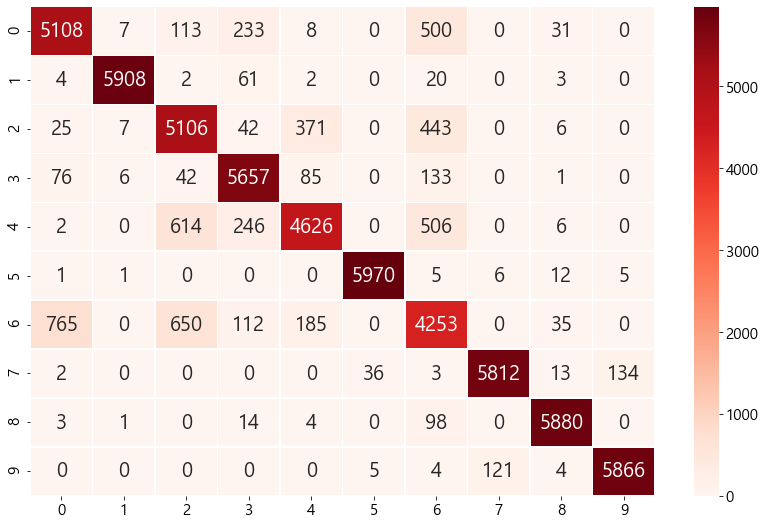

In [147]:
sns.heatmap(confusion_matrix(y_train, model_mlp.predict(x_train.reshape(60000, 28*28))),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

#### Test data

In [148]:
confusion_matrix(y_test, model_mlp.predict(x_test.reshape(10000, 28*28)))

array([[787,   3,  27,  65,   2,   1, 104,   0,  11,   0],
       [  3, 954,   3,  32,   2,   0,   3,   0,   3,   0],
       [ 12,   3, 793,   7,  72,   0, 108,   0,   5,   0],
       [ 25,  17,  11, 876,  21,   0,  42,   0,   8,   0],
       [  2,   1, 138,  47, 690,   1, 117,   0,   4,   0],
       [  0,   0,   0,   0,   0, 955,   1,  26,   7,  11],
       [119,   3, 133,  39,  56,   1, 635,   0,  14,   0],
       [  0,   0,   0,   0,   0,  20,   0, 942,   5,  33],
       [  3,   0,   3,   6,   1,   4,  22,   2, 959,   0],
       [  0,   0,   0,   0,   0,   6,   2,  38,   1, 953]], dtype=int64)

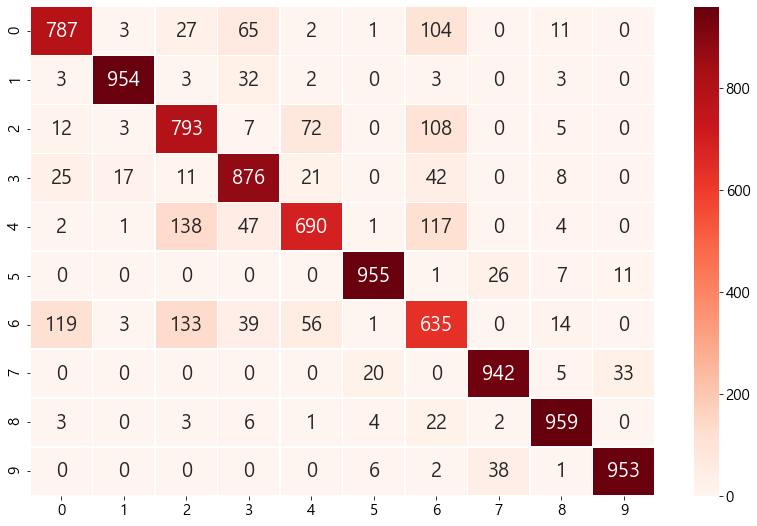

In [149]:
sns.heatmap(confusion_matrix(y_test, model_mlp.predict(x_test.reshape(10000, 28*28))),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

## Modeling(Keras version)

In [129]:
model = Sequential()
model.add( Flatten( input_shape=(28,28)))                   

model.add( Dense( units=64, activation='relu' ) )
model.add( Dense( units=32, activation='relu' ) )
model.add( Dense( units=10, activation='softmax' ) )
model.compile( loss='sparse_categorical_crossentropy',      
               optimizer='adam', metrics=['acc'])                                          
                                                                         
model.fit( x_train, y_train, epochs = 10)                  

Epoch 1/10
1875/1875 [==============================] - 2s 792us/step - loss: 1.8751 - acc: 0.5877
Epoch 2/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.8628 - acc: 0.6797
Epoch 3/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.7546 - acc: 0.7042 1s - 
Epoch 4/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.6820 - acc: 0.7263
Epoch 5/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.6065 - acc: 0.7665
Epoch 6/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.5394 - acc: 0.8019
Epoch 7/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.4912 - acc: 0.8246
Epoch 8/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.4501 - acc: 0.8462
Epoch 9/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.4257 - acc: 0.8523
Epoch 10/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.4194 - acc: 0.8533


### Prediction

#### 우리가 학습한 model에서 이미 flatten을 해주니까 우리는 3차원 형태로 1장씩 넣어줘야 한다. ==> 그래서 1 by 28 by 28 임!!

In [130]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [131]:
x_test[0].shape

(28, 28)

In [132]:
x_test[0].reshape(1,28,28).shape

(1, 28, 28)

In [134]:
model.predict( x_test[0].reshape(1,28,28)).argmax(axis=1)

array([9], dtype=int64)

### Accuracy

#### Train data

In [137]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 1s 599us/step - loss: 0.3778 - acc: 0.8664


[0.37776920199394226, 0.8664000034332275]

#### Test data

In [139]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.4569 - acc: 0.8458


[0.45689672231674194, 0.84579998254776]

### confusion matrix(heatmap)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

#### Train data

In [154]:
confusion_matrix(y_train, model.predict( x_train.reshape(60000,28,28)).argmax(axis=1))

array([[4514,    2,   90,  304,   14,    2, 1058,    1,   14,    1],
       [   4, 5752,   11,  176,   15,    0,   42,    0,    0,    0],
       [  14,    1, 4883,   38,  603,    7,  448,    0,    3,    3],
       [ 110,   10,   96, 5341,  213,   14,  209,    0,    4,    3],
       [   4,    5,  728,  149, 4631,    5,  476,    0,    1,    1],
       [   0,    0,    0,    0,    0, 5870,    1,   88,    7,   34],
       [ 577,    7,  826,  182,  387,    6, 3997,    1,   17,    0],
       [   0,    0,    0,    0,    0,  122,    0, 5696,    0,  182],
       [   2,    0,   50,   24,   15,   98,  221,   13, 5575,    2],
       [   0,    0,    1,    0,    0,   90,    0,  184,    0, 5725]],
      dtype=int64)

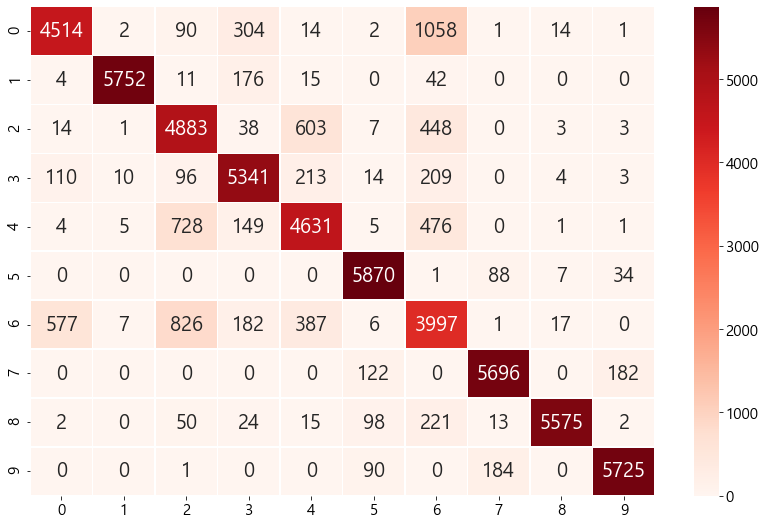

In [155]:
sns.heatmap(confusion_matrix(y_train, model.predict( x_train.reshape(60000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

#### Test data

In [153]:
confusion_matrix(y_test, model.predict( x_test.reshape(10000,28,28)).argmax(axis=1))

array([[730,   1,  21,  46,   2,   0, 198,   0,   2,   0],
       [  1, 946,   3,  37,   3,   0,  10,   0,   0,   0],
       [  6,   0, 791,   7, 106,   0,  90,   0,   0,   0],
       [ 12,   3,  30, 866,  39,   3,  46,   0,   1,   0],
       [  0,   1, 149,  25, 743,   0,  80,   0,   1,   1],
       [  0,   0,   2,   0,   0, 968,   0,  19,   1,  10],
       [ 98,   1, 147,  43,  76,   1, 630,   0,   4,   0],
       [  0,   0,   0,   0,   0,  24,   0, 946,   0,  30],
       [  0,   0,   7,   8,   3,  23,  56,   4, 899,   0],
       [  0,   0,   0,   0,   0,  22,   1,  38,   0, 939]], dtype=int64)

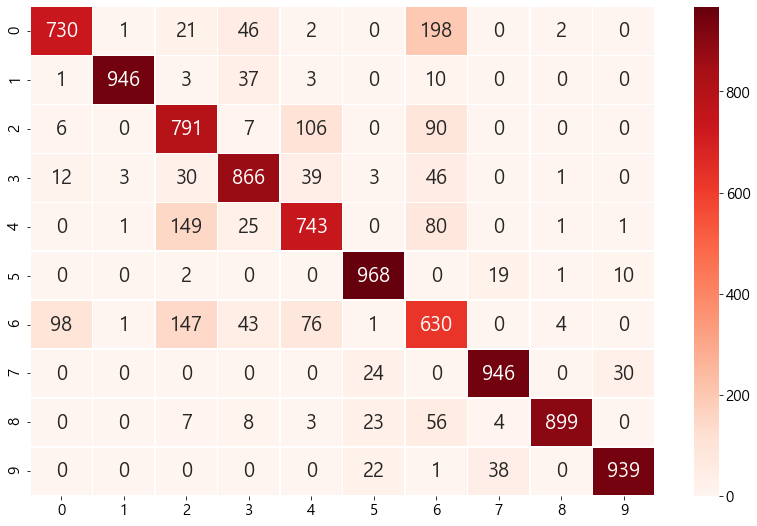

In [159]:
sns.heatmap(confusion_matrix(y_test, model.predict( x_test.reshape(10000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );